# 1) Imports

In [148]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

# 2) Entender dataset

In [150]:
dataset = pd.read_csv('train.csv')
dataset

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN
...,...,...,...
115483,case30_day0_slice_0143,small_bowel,NaN
115484,case30_day0_slice_0143,stomach,NaN
115485,case30_day0_slice_0144,large_bowel,NaN
115486,case30_day0_slice_0144,small_bowel,NaN


large_bowel    38496
small_bowel    38496
stomach        38496
Name: class, dtype: int64


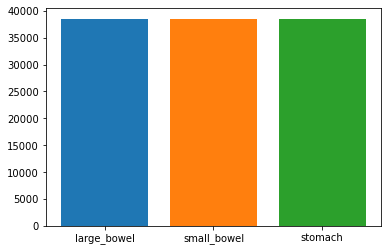

In [151]:
orgaos = dataset['class']

print(orgaos.value_counts())

for i in range(orgaos.unique().size):
	plt.bar(orgaos.value_counts().keys()[i], orgaos.value_counts().values[i])

plt.show()

Não segmentado    81575
Segmentado        33913
Name: segmentation, dtype: int64


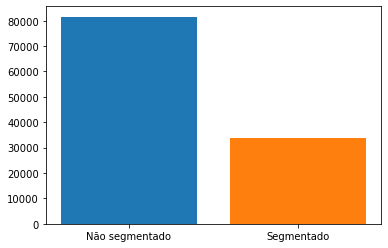

In [152]:
segmentados = dataset['segmentation'].astype('str')
segmentados = segmentados.apply(lambda x: 'Segmentado' if x != 'nan' else 'Não segmentado')

print(segmentados.value_counts())

for i in range(segmentados.unique().size):
	plt.bar(segmentados.value_counts().keys()[i], segmentados.value_counts().values[i])

plt.show()

# 3) Preparar imagens

In [217]:
imagens = [
	join(dirname, file)
	for dirname, _, filenames in walk(join('.', 'train'))
	for file in filenames
	if file.endswith('.png')
]

def obter_imagem(caso, dia, fatia):
	imagem_orgao = [
		i
		for i in imagens
		if dia in i and
		caso in i and
		fatia in i
	]

	if not imagem_orgao:
		return None

	imagem_orgao = imagem_orgao[0]
	return imagem_orgao

In [269]:
def desenhar_imagem_orgao(imagem_orgao, titulo, segmentacao=None):
	# Remover transparência
	fig = plt.figure(figsize=(10, 10))
	fig.patch.set_alpha(1)

	imagem = plt.imread(imagem_orgao)
	largura, altura = pd.DataFrame(imagem).shape
	largura = str(largura)
	altura = str(altura)
	plt.imshow(imagem, cmap='gray')

	# Remover labels X e Y
	plt.xticks([])
	plt.yticks([])

	if segmentacao:
		# np_segmentacao = pd.array(segmentacao)
		print(segmentacao)
		# print(np_segmentacao)

	# TODO Além de retornar a imagem, retornar também as dimensões e depois salvar isso no dataframe
	plt.title(titulo + ' - ' + 'x'.join([largura, altura]))
	plt.show()

## Estômago

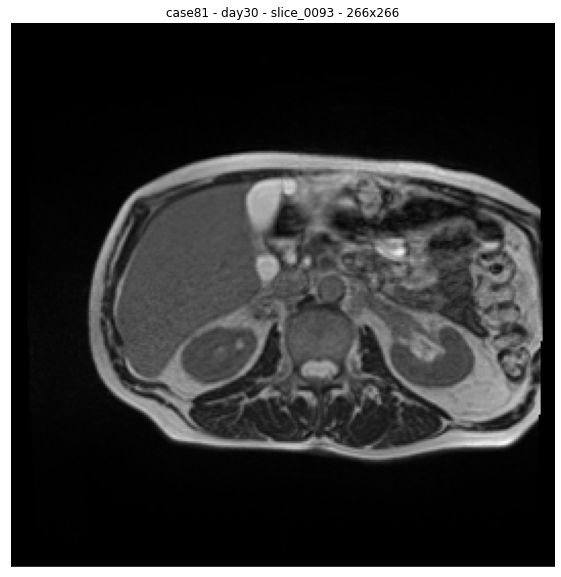

In [273]:
estomagos = dataset[dataset['class'] == 'stomach']
estomagos = estomagos[estomagos['segmentation'].notnull()]

exemplo_estomago = estomagos.sample(1).iloc[0]
caso, dia, fatia = exemplo_estomago['id'].split('_', 2)

padrao_info = 'slice_[0-9]+_'

imagem_orgao = obter_imagem(caso, dia, fatia)
desenhar_imagem_orgao(
	imagem_orgao,
	titulo=' - '.join([caso, dia, fatia]),
	# segmentacao=exemplo_estomago['segmentation']
)

## Intestino Delgado

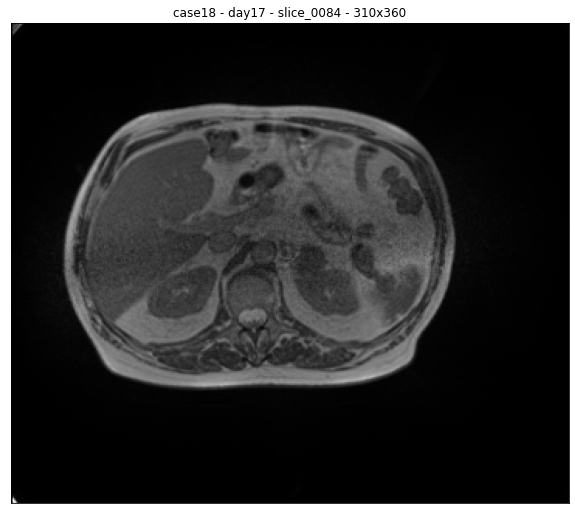

In [272]:
delgados = dataset[dataset['class'] == 'small_bowel']
delgados = delgados[delgados['segmentation'].notnull()]

exemplo_delgado = delgados.sample(1).iloc[0]
caso, dia, fatia = exemplo_delgado['id'].split('_', 2)

padrao_info = 'slice_[0-9]+_'

imagem_orgao = obter_imagem(caso, dia, fatia)
desenhar_imagem_orgao(
	imagem_orgao,
	titulo=' - '.join([caso, dia, fatia]),
	# segmentacao=exemplo_delgado['segmentation']
)

## Intestino Grosso

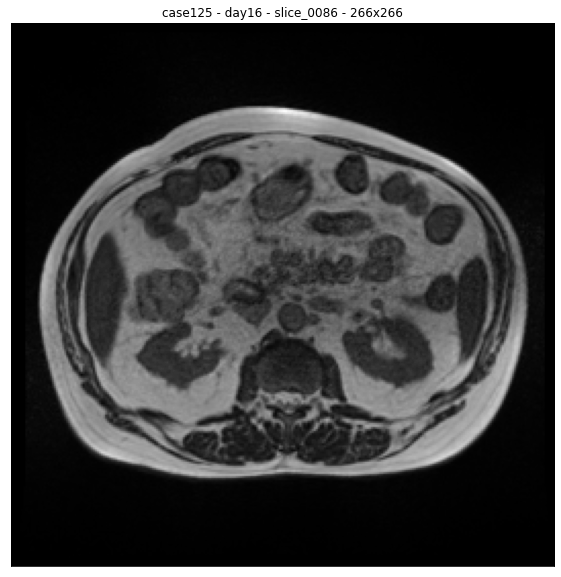

In [275]:
grossos = dataset[dataset['class'] == 'large_bowel']
grossos = grossos[grossos['segmentation'].notnull()]

exemplo_grosso = grossos.sample(1).iloc[0]
caso, dia, fatia = exemplo_grosso['id'].split('_', 2)

padrao_info = 'slice_[0-9]+_'

imagem_orgao = obter_imagem(caso, dia, fatia)
desenhar_imagem_orgao(
	imagem_orgao,
	titulo=' - '.join([caso, dia, fatia]),
	# segmentacao=exemplo_grosso['segmentation']
)

# 4) Exportar dados com imagem correspondente

In [281]:
df_dados = pd.DataFrame(dataset)
df_dados['image'] = df_dados['id'].apply(lambda x: obter_imagem(*x.split('_', 2)))
df_dados.reset_index().drop(columns=['index']).to_feather('train_com_imagens.feather')

,id,class,segmentation,image
0,case123_day20_slice_0001,large_bowel,NaN,.\train\case123\case123_day20\scans\slice_0001...
1,case123_day20_slice_0001,small_bowel,NaN,.\train\case123\case123_day20\scans\slice_0001...
2,case123_day20_slice_0001,stomach,NaN,.\train\case123\case123_day20\scans\slice_0001...
3,case123_day20_slice_0002,large_bowel,NaN,.\train\case123\case123_day20\scans\slice_0002...
4,case123_day20_slice_0002,small_bowel,NaN,.\train\case123\case123_day20\scans\slice_0002...
...,...,...,...,...
115483,case30_day0_slice_0143,small_bowel,NaN,.\train\case30\case30_day0\scans\slice_0143_26...
115484,case30_day0_slice_0143,stomach,NaN,.\train\case30\case30_day0\scans\slice_0143_26...
115485,case30_day0_slice_0144,large_bowel,NaN,.\train\case30\case30_day0\scans\slice_0144_26...
115486,case30_day0_slice_0144,small_bowel,NaN,.\train\case30\case30_day0\scans\slice_0144_26...
